**What affects betting over/unders lines?**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("NBA_2021_2022_Bet_Outcomes.csv")

In [33]:
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

home_team_score = df["Final"]
away_team_score = df["Final"].shift(-1)  # Shifting to align away team scores

In [34]:
# Calculate total score
total_score = home_team_score + away_team_score

From the cv file, we have gathered all the home team and away team total scores as well as the total over under scores from each game for comparison to see how accurate the over/under line are that are set by the betting odds makers

In [35]:
over_under = df.loc[df["Close"].gt(200), "Close"]


print("Total Score:")
print(total_score)
print("\nOver/Under Closed:")
print(over_under)

Total Score:
0       231.0
1       248.0
2       235.0
3       236.0
4       245.0
        ...  
2641    191.0
2642    198.0
2643    207.0
2644    193.0
2645      NaN
Name: Final, Length: 2646, dtype: float64

Over/Under Closed:
0       233.5
2       226.5
5       223.0
7       218.0
8       223.0
        ...  
2636    213.5
2638    214.5
2640    213.5
2642    211.0
2644    211.5
Name: Close, Length: 1320, dtype: float64


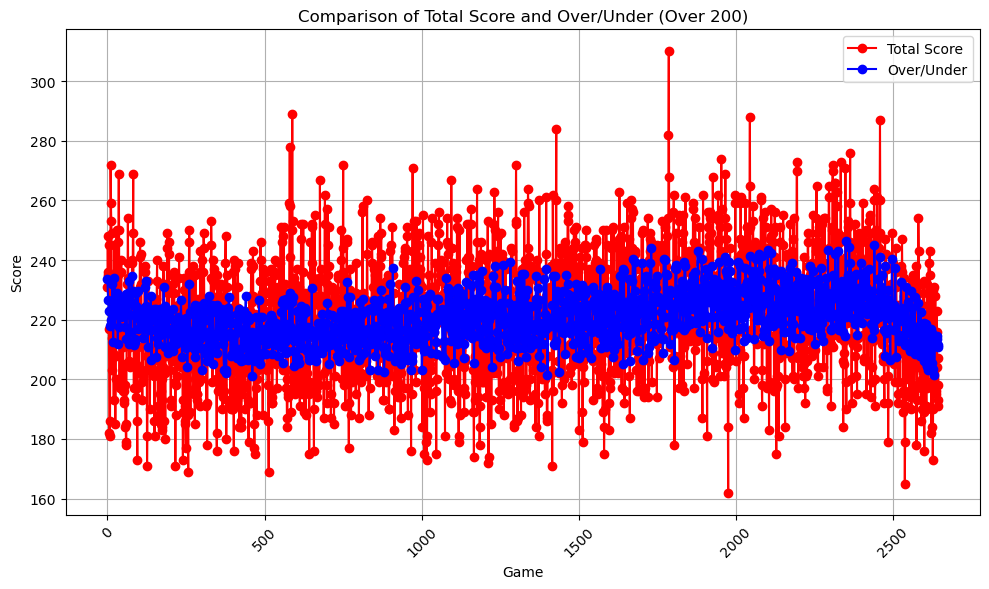

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_score.index, total_score, marker='o', linestyle='-', color='r', label="Total Score")
ax.plot(over_under.index, over_under, marker='o', linestyle='-', color='b', label="Over/Under")
ax.set_xlabel("Game")
ax.set_ylabel("Score")
ax.set_title("Comparison of Total Score and Over/Under (Over 200)")
ax.legend()
ax.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

As we can see here, this is a mapping of all the over unders for every game in the season and the the total score of the same game. Clearly there is quite a big discrepancy, and what seems like a big loophole to make money. 

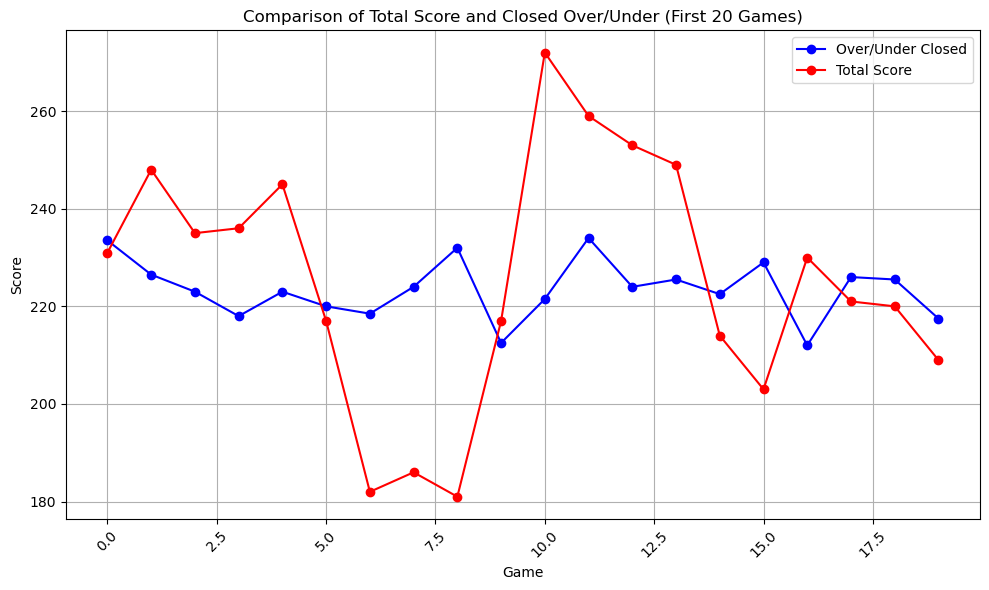

In [43]:
over_under = over_under.reset_index(drop=True)
total_score = total_score.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(over_under[:20], marker='o', linestyle='-', color='b', label="Over/Under Closed")
ax.plot(total_score[:20], marker='o', linestyle='-', color='r', label="Total Score")
ax.set_xlabel("Game")
ax.set_ylabel("Score")
ax.set_title("Comparison of Total Score and Closed Over/Under (First 20 Games)")
ax.legend()
ax.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

A more zoomed in look at just the first twenty games of the season, and it still seems like the odds makers were not very accurate making the over/under lines. 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [48]:
X = np.arange(len(over_under)).reshape(-1, 1)  # Using game index as feature
y = over_under

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train MSE: 64.2925754990198
Test MSE: 68.72168256202619
Train R^2: 0.09928195957350172
Test R^2: 0.09918088883683762


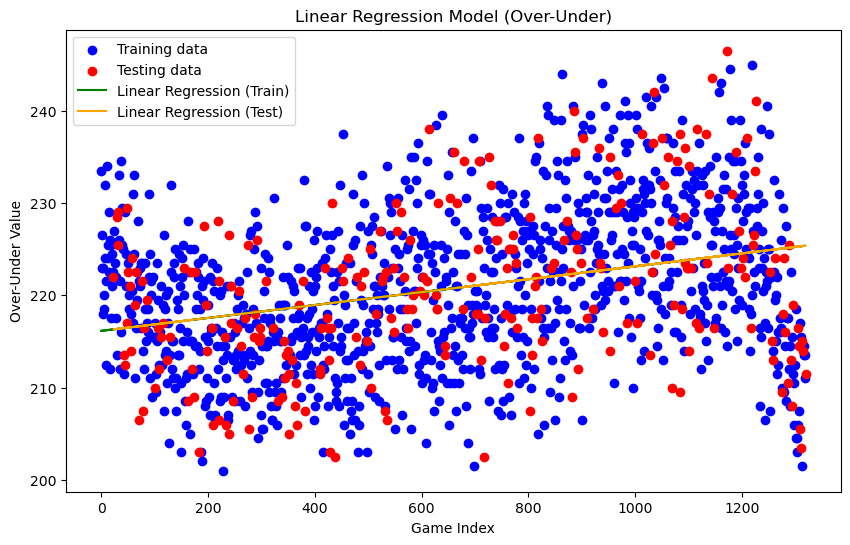

In [51]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_train, y_pred_train, color='green', label='Linear Regression (Train)')
plt.plot(X_test, y_pred_test, color='orange', label='Linear Regression (Test)')
plt.title('Linear Regression Model (Over-Under)')
plt.xlabel('Game Index')
plt.ylabel('Over-Under Value')
plt.legend()
plt.show()